##  Risk Score Prediction Project

### 📌 Problem Statement
The objective of this project is to develop a machine learning model that predicts the **Risk Score** of customers based on various demographic, behavioral, and financial features. Risk scores help businesses make informed decisions regarding insurance claims, credit approvals, and policy recommendations.


### 📂 Dataset Description
- **Source**: [synthetic Dataset]
- **Target Variable**: `Risk_Score_Label` (e.g., Low, Medium, High)
- **Sample Features**:
  - `Age`
  - `Gender`
  - `Income`
  - `Policy_Type`
  - `Claim_Amount`
  - `Claim_Frequency`
  - `Premium_Amount`
  - `Claim_Income_Ratio`, `Premium_Income_Ratio` (Engineered Features)


### ⚙️ Tech Stack
- **Programming Language**: Python
- **Libraries**:
  - Data: Pandas, NumPy
  - Visualization: Seaborn, Matplotlib
  - ML: Scikit-learn, XGBoost,Random forest Classifer
  - Imbalanced Data: SMOTE
  - Model Tuning: KFold
  - App: Streamlit


### 🔄 Workflow

#### 1. Data Preprocessing
- Handling missing values
- Outlier removal
- Feature engineering (ratios, differences)
- One-hot encoding categorical features
- Normalization or standardization

#### 2. Exploratory Data Analysis (EDA)
- Risk Score distribution
- Feature importance (correlation with risk)
- Boxplots by risk class
- Claim & income patterns across risk levels

#### 3. Model Building
- Models Used:
  - Random Forest
  - XGBoost 
- K-Fold Cross Validation
- SMOTE for class imbalance


#### 4. Evaluation Metrics
- Accuracy, Precision, Recall, F1-Score
- ROC-AUC Score (Multiclass)
- Confusion Matrix
- Feature importance plot

#### 5. Visualizations
- Confusion Matrix heatmap
- ROC Curve for multiclass
- Risk score probability distributions

#### 6. Deployment
- **Streamlit App**:
  - Upload data / input new customer info
  - Display predicted Risk Score



### 📈 Results
- **Best Model**: [Random Forest]
- **Accuracy**: [98.2%]
- **ROC AUC Score**: [0.96]
- **Insights**:
  - Income-to-Claim ratio is a strong indicator
  - Higher claim frequency → higher risk
  - Some policy types correlate with specific risk levels


### 🚀 Future Enhancements
- Add SHAP-based explainability
- Deploy as an API with FastAPI
- Add real-time risk monitoring dashboard
- Collect real customer feedback for retraining




<h3>Import Libraries</h3>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import KFold, cross_val_score, cross_val_predict
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, f1_score, roc_auc_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import ConfusionMatrixDisplay
import pickle

<h3>Load Preprocessed dataset</h3>

In [2]:
df = pd.read_csv("D:/AI-Powered Intelligent Insurance Risk Assessment and Customer Insights System/Dataset/preprocessed_insurance_base_data.csv")

In [3]:
df.head()

,Unnamed: 0,Customer_Age,Annual_Income,Vehicle_or_Property_Age,Claim_History,Fraudulent_Claim,Premium_Amount,Claim_Amount,Claim_Income_Ratio,Premium_Income_Ratio,...,Claim_Premium_Diff,Gender_Male,Gender_Other,Policy_Type_Health,Policy_Type_Life,Policy_Type_Property,Age_Group_Adult,Age_Group_Mid-Age,Age_Group_Senior,Risk_Score_Label
0,0,43,20555.17,1.2,0,0,378.96,201.18,0.009787,0.018436,...,-177.78,0,0,0,0,0,0,1,0,0
1,1,47,24859.15,4.0,0,0,504.34,473.18,0.019034,0.020288,...,-31.16,1,0,1,0,0,0,1,0,1
2,2,38,10803.51,6.5,0,0,269.97,412.07,0.038142,0.024989,...,142.10,0,0,1,0,0,1,0,0,0
3,3,34,33232.13,2.6,0,0,238.96,467.02,0.014053,0.007191,...,228.06,1,0,0,0,1,1,0,0,0
4,4,46,23997.00,0.3,0,0,276.97,255.20,0.010635,0.011542,...,-21.77,1,0,1,0,0,0,1,0,0


In [4]:
if 'Unnamed: 0' in df.columns:
    df.drop(columns=['Unnamed: 0'], inplace=True)
df.head()

,Customer_Age,Annual_Income,Vehicle_or_Property_Age,Claim_History,Fraudulent_Claim,Premium_Amount,Claim_Amount,Claim_Income_Ratio,Premium_Income_Ratio,High_Claim,Claim_Premium_Diff,Gender_Male,Gender_Other,Policy_Type_Health,Policy_Type_Life,Policy_Type_Property,Age_Group_Adult,Age_Group_Mid-Age,Age_Group_Senior,Risk_Score_Label
0,43,20555.17,1.2,0,0,378.96,201.18,0.009787,0.018436,False,-177.78,0,0,0,0,0,0,1,0,0
1,47,24859.15,4.0,0,0,504.34,473.18,0.019034,0.020288,True,-31.16,1,0,1,0,0,0,1,0,1
2,38,10803.51,6.5,0,0,269.97,412.07,0.038142,0.024989,False,142.10,0,0,1,0,0,1,0,0,0
3,34,33232.13,2.6,0,0,238.96,467.02,0.014053,0.007191,False,228.06,1,0,0,0,1,1,0,0,0
4,46,23997.00,0.3,0,0,276.97,255.20,0.010635,0.011542,False,-21.77,1,0,1,0,0,0,1,0,0


In [5]:
df.columns

Index(['Customer_Age', 'Annual_Income', 'Vehicle_or_Property_Age',
       'Claim_History', 'Fraudulent_Claim', 'Premium_Amount', 'Claim_Amount',
       'Claim_Income_Ratio', 'Premium_Income_Ratio', 'High_Claim',
       'Claim_Premium_Diff', 'Gender_Male', 'Gender_Other',
       'Policy_Type_Health', 'Policy_Type_Life', 'Policy_Type_Property',
       'Age_Group_Adult', 'Age_Group_Mid-Age', 'Age_Group_Senior',
       'Risk_Score_Label'],
      dtype='object')

In [6]:
df.isnull().sum()

Customer_Age               0
Annual_Income              0
Vehicle_or_Property_Age    0
Claim_History              0
Fraudulent_Claim           0
Premium_Amount             0
Claim_Amount               0
Claim_Income_Ratio         0
Premium_Income_Ratio       0
High_Claim                 0
Claim_Premium_Diff         0
Gender_Male                0
Gender_Other               0
Policy_Type_Health         0
Policy_Type_Life           0
Policy_Type_Property       0
Age_Group_Adult            0
Age_Group_Mid-Age          0
Age_Group_Senior           0
Risk_Score_Label           0
dtype: int64

In [7]:
df["Risk_Score_Label"].value_counts()

Risk_Score_Label
0    4820
1    2306
2     399
Name: count, dtype: int64

<h3>Feature Selection</h3>

In [8]:
X = df.drop(['Risk_Score_Label', 'Claim_Amount', 'Fraudulent_Claim'],axis=1)
y = df["Risk_Score_Label"]

In [16]:
X.columns

Index(['Customer_Age', 'Annual_Income', 'Vehicle_or_Property_Age',
       'Claim_History', 'Premium_Amount', 'Claim_Income_Ratio',
       'Premium_Income_Ratio', 'High_Claim', 'Claim_Premium_Diff',
       'Gender_Male', 'Gender_Other', 'Policy_Type_Health', 'Policy_Type_Life',
       'Policy_Type_Property', 'Age_Group_Adult', 'Age_Group_Mid-Age',
       'Age_Group_Senior'],
      dtype='object')

<h3>Scaling Input Features</h3>

In [9]:
# 4. 🔀 Feature Scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [10]:
with open('scaler_risk.pkl', 'wb') as f:
    pickle.dump(scaler, f)

In [11]:
# 5. Risk Score Classification with KFold
clf_risk = RandomForestClassifier(n_estimators=100,
    max_depth=6,  # limits tree depth
    min_samples_split=20,
    min_samples_leaf=5,
    max_features='sqrt',
    random_state=42)
kf = KFold(n_splits=5, shuffle=True, random_state=42)

print("\n📊 Risk Score Classification (KFold)")
scores = cross_val_score(clf_risk,X_scaled,y,cv=kf,scoring='accuracy')
print("Accuracy Scores:", scores)
print("Mean Accuracy:", np.mean(scores))
#cross fold predictions
y_pred = cross_val_predict(clf_risk,X_scaled,y,cv=kf)
print(classification_report(y,y_pred))
clf_risk.fit(X_scaled, y)


📊 Risk Score Classification (KFold)
Accuracy Scores: [0.98936877 0.9820598  0.97940199 0.97740864 0.97674419]
Mean Accuracy: 0.9809966777408639
              precision    recall  f1-score   support

           0       0.97      1.00      0.99      4820
           1       0.99      0.95      0.97      2306
           2       1.00      0.93      0.96       399

    accuracy                           0.98      7525
   macro avg       0.99      0.96      0.97      7525
weighted avg       0.98      0.98      0.98      7525



RandomForestClassifier(max_depth=6, min_samples_leaf=5, min_samples_split=20,
                       random_state=42)

In [12]:
with open('model_risk_score.pkl', 'wb') as f:
    pickle.dump(clf_risk, f)

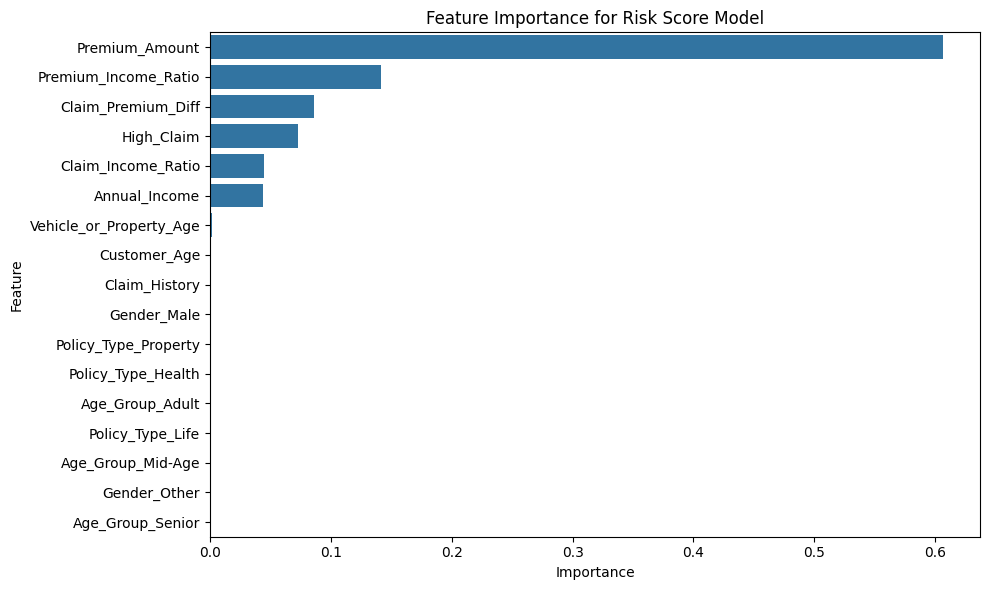

In [13]:
# 6. 📊 Feature Importance
importances = clf_risk.feature_importances_
features = X.columns
feature_importance_df = pd.DataFrame({'Feature': features, 'Importance': importances})
feature_importance_df.sort_values(by='Importance', ascending=False, inplace=True)

plt.figure(figsize=(10, 6))
sns.barplot(data=feature_importance_df, x='Importance', y='Feature')
plt.title("Feature Importance for Risk Score Model")
plt.tight_layout()
plt.show()

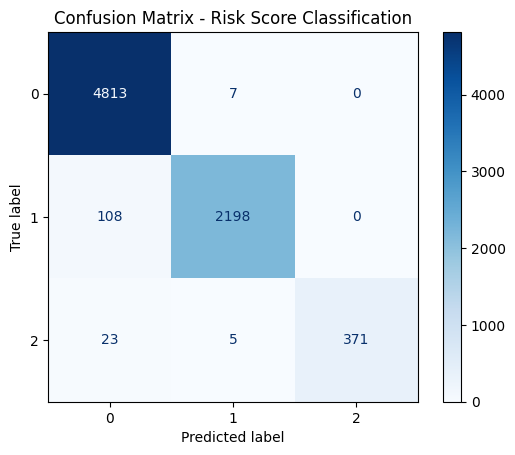

In [14]:

# Confusion Matrix
cm = confusion_matrix(y, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=np.unique(y))
disp.plot(cmap='Blues')
plt.title("Confusion Matrix - Risk Score Classification")
plt.show()

📊 Summary:

Most predictions are on point.

Some class 1 → class 0 misclassifications (108) — possibly due to feature similarities.

No misclassifications into class 2 from 0 or 1, which is great.

In [15]:
from xgboost import XGBClassifier
from sklearn.model_selection import KFold, cross_val_score, cross_val_predict
from sklearn.metrics import classification_report
import numpy as np

# Define the XGBoost Classifier with tuned hyperparameters
clf_xgb = XGBClassifier(
    objective='multi:softprob',
    num_class=3,  # Change as per your number of risk classes
    max_depth=6,
    learning_rate=0.1,
    n_estimators=100,
    subsample=0.8,
    colsample_bytree=0.8,
    use_label_encoder=False,
    eval_metric='mlogloss',
    random_state=42
)

# Initialize 5-Fold Cross Validator
kf = KFold(n_splits=5, shuffle=True, random_state=42)

print("\n📊 Risk Score Classification with XGBoost (KFold)")

# Accuracy scores for each fold
scores = cross_val_score(clf_xgb, X_scaled, y, cv=kf, scoring='accuracy')
print("Fold-wise Accuracy Scores:", scores)
print("Mean Cross-Validated Accuracy:", np.mean(scores).round(4))

# Predictions across all folds
y_pred = cross_val_predict(clf_xgb, X_scaled, y, cv=kf)
print("\n🧾 Classification Report:\n")
print(classification_report(y, y_pred))

# Fit final model (useful for saving or deployment)
clf_xgb.fit(X_scaled, y)



📊 Risk Score Classification with XGBoost (KFold)


d:\AI-Powered Intelligent Insurance Risk Assessment and Customer Insights System\env\Lib\site-packages\xgboost\training.py:183: UserWarning: [18:40:23] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
d:\AI-Powered Intelligent Insurance Risk Assessment and Customer Insights System\env\Lib\site-packages\xgboost\training.py:183: UserWarning: [18:40:23] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
d:\AI-Powered Intelligent Insurance Risk Assessment and Customer Insights System\env\Lib\site-packages\xgboost\training.py:183: UserWarning: [18:40:24] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
d:\AI-Powered Intelligent Insurance Risk Assessme

Fold-wise Accuracy Scores: [0.99269103 0.98405316 0.9820598  0.98272425 0.97940199]
Mean Cross-Validated Accuracy: 0.9842


d:\AI-Powered Intelligent Insurance Risk Assessment and Customer Insights System\env\Lib\site-packages\xgboost\training.py:183: UserWarning: [18:40:25] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
d:\AI-Powered Intelligent Insurance Risk Assessment and Customer Insights System\env\Lib\site-packages\xgboost\training.py:183: UserWarning: [18:40:26] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)



🧾 Classification Report:

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      4820
           1       0.98      0.97      0.97      2306
           2       0.98      0.93      0.96       399

    accuracy                           0.98      7525
   macro avg       0.98      0.97      0.97      7525
weighted avg       0.98      0.98      0.98      7525



d:\AI-Powered Intelligent Insurance Risk Assessment and Customer Insights System\env\Lib\site-packages\xgboost\training.py:183: UserWarning: [18:40:27] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.8, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='mlogloss',
              feature_types=None, feature_weights=None, gamma=None,
              grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=6, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=100, n_jobs=None, num_class=3, ...)